In [51]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles

# Inicializacion

In [52]:
data = readdlm("figs/poset0p95_univ_30.dat",Int)

30×30 Array{Int64,2}:
 0  0  0  0  1  0  1  0  1  1  0  1  1  …  1  1  1  1  0  0  0  0  0  0  1  0
 1  0  0  0  1  0  1  0  1  1  0  1  1     1  1  1  1  1  1  1  0  0  0  1  1
 1  1  0  0  1  0  1  1  1  1  0  1  1     1  1  1  1  1  1  1  1  0  0  1  1
 1  1  1  0  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 1  1  1  0  1  0  1  1  1  1  0  1  1  …  1  1  1  1  1  1  1  1  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  0  1  0  1  1  0  1  1     1  1  1  1  1  1  1  0  0  0  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 1  1  1  0  1  0  1  1  1  1  0  1  1  …  1  1  1  1  1  1  1  1  0  0  1  1
 0  0  0  0  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  1  0  1  0  1  1  0  1  0    

In [53]:
list_dataframes = [DataFrame(CSV.File("data/"*f)) for f in readdir("data")];

In [54]:
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);
nombresbuenos = nombresbuenos[1:30];

In [55]:
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes];

In [56]:
puntuaciones = hcat([(sort(d, by = first).Points) for d in data_filtrada]...)/100;

In [57]:
ranks_univs = [sortperm(puntuaciones[:,x], rev = true) for x in 1:14]

14-element Array{Array{Int64,1},1}:
 [4, 11, 3, 28, 27, 6, 8, 30, 26, 2  …  18, 29, 17, 10, 16, 15, 9, 7, 5, 14]
 [4, 11, 28, 27, 6, 3, 8, 26, 2, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 28, 11, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 28, 11, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 9, 7, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  5, 12, 17, 16, 10, 29, 7, 9, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  17, 5, 10, 16, 12, 29, 7, 9, 15, 14]
 [4, 11, 28, 27, 6, 3, 2, 8, 26, 25  …  17, 10, 5, 12, 16, 29, 7, 9, 15, 14]
 [4, 28, 11, 6, 27, 3, 8, 2, 26, 25  …  17, 10, 5, 12, 16, 7, 29, 14, 15, 9]
 [4, 11, 6, 28, 27, 3, 8, 2, 26, 25  …  17, 10, 12, 16, 5, 7, 29, 15, 9, 14]
 [4, 11, 6, 28, 27, 3, 8, 2, 26, 25  …  17, 10, 12, 5, 16, 7, 29, 9, 15, 14]
 [4, 11, 28, 6, 27, 3, 8, 2, 26, 25  …  18, 17, 12, 5, 16, 7, 29, 15, 9, 14]
 [4, 11, 6, 28, 27, 8, 3, 2, 25, 26  …  12, 18, 16, 17, 5, 7, 29, 9, 15, 14]
 [4, 11, 6, 28, 27, 8, 3, 2, 26, 25  …  

In [19]:
[sortperm(ranks_univs[x])[4] for x in 1:14]

14-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

## Histogramas, no me gustan

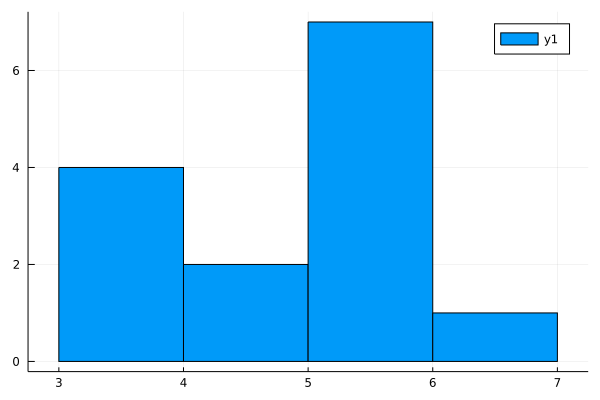

In [21]:
[sortperm(ranks_univs[x])[6] for x in 1:14] |> histogram

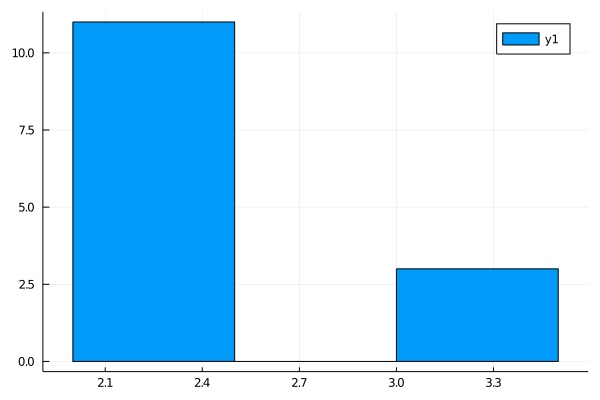

In [22]:
[sortperm(ranks_univs[x])[11] for x in 1:14] |> histogram

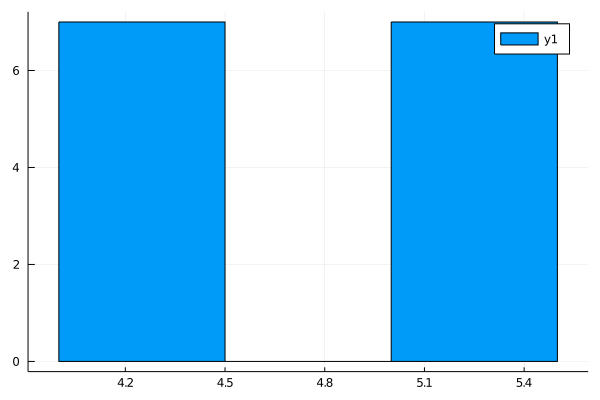

In [23]:
[sortperm(ranks_univs[x])[27] for x in 1:14] |> histogram

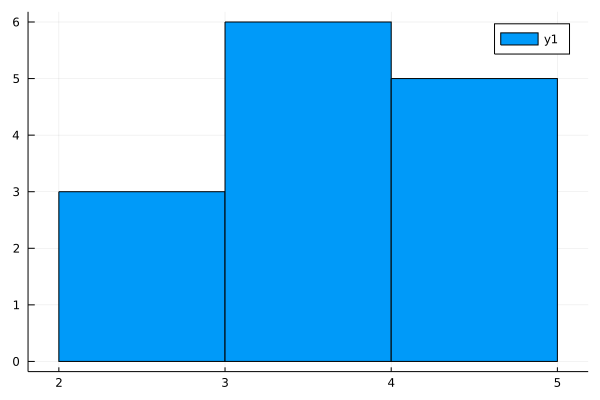

In [24]:
[sortperm(ranks_univs[x])[28] for x in 1:14] |> histogram

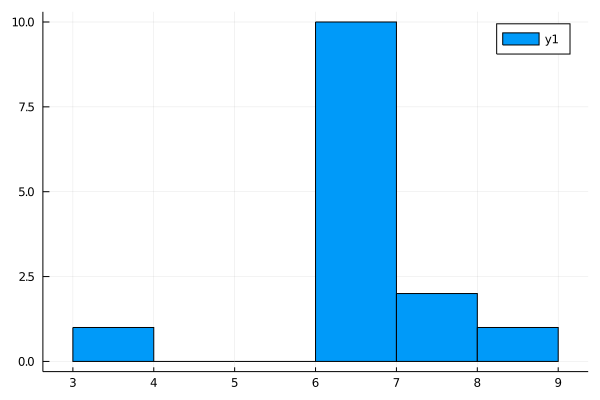

In [25]:
[sortperm(ranks_univs[x])[3] for x in 1:14] |> histogram

# Grafica de posiciones

In [58]:
function parejapromvar(listaranks,nodo)
    (posicionpromedio(listaranks, nodo)
        ,2*posicionvarianza(listaranks,nodo) )
        #,sqrt(posicionvarianza(listaranks,nodo)) )
end

parejapromvar (generic function with 1 method)

In [59]:
function findinter(pi,vi,pj,vj)
    as = pi - vi/2
    ae = pi + vi/2
    bs = pj - vj/2
    be = pj + vj/2
    
    #@show as,ae, bs,be
    
    if bs > ae || as > be
        return 0.0
    else
        os = max(as,bs)
        oe = min(ae,be)
        return oe-os
    end
end

findinter (generic function with 1 method)

![ejemplo](figs/poset0p95_univ_30.png)

primeros cinco

In [2]:
using Statistics

In [60]:
function correlacion(ranks,l1,l2)
    pos1 = [r[l1] for r in ranks]
    pos2 = [r[l2] for r in ranks]
    #@show pos1
    xx = mean(pos1.*pos2) - mean(pos1)*mean(pos2)
    x1 = sqrt(mean(pos1.*pos1) - mean(pos1)^2)
    x2 = sqrt(mean(pos2.*pos2) - mean(pos2)^2)
    xx/(x1*x2)
end

correlacion (generic function with 2 methods)

In [61]:
correlacion(sortperm.(ranks_univs),6,6)

0.9999999999999999

## Comparativa correlacion

In [62]:
matconci = zeros(Float64,10,10)

10×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [63]:
lista = [6,11,27,28, 3, 2,8,26, 25,30]#[6,11,27,28,3]
for (x,i) in enumerate(lista), (y,j) in enumerate(lista)
    matconci[x,y] = correlacion(sortperm.(ranks_univs), i,j)
end

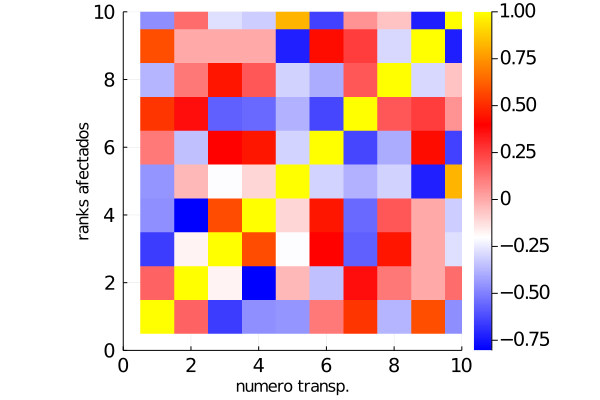

In [65]:
heatmap(1:size(matconci,1),
    1:size(matconci,2), matconci,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,10),ylim=(0,10)
    ,ytickfontsize=13,xtickfontsize=13)

## Comparativa traslape

In [66]:
xs =1:10

1:10

In [67]:
μs = [posicionpromedio(ranks_univs,x) for x in [6,11,27,28, 3, 2,8,26, 25,30]]

10-element Array{Float64,1}:
  4.357142857142858
  2.2142857142857144
  4.5
  3.142857142857143
  6.071428571428571
  7.928571428571428
  7.142857142857142
  8.857142857142858
 10.0
 10.785714285714286

In [68]:
σs = [sqrt(posicionvarianza(ranks_univs,x))/2 for x in [6,11,27,28,3, 2,8,26, 25,30]]

10-element Array{Float64,1}:
 0.49283202203357657
 0.32028343046594826
 0.3535533905932738
 0.4307863417513633
 0.5080922352782199
 0.46997942350195804
 0.43078634175136404
 0.3996487723614083
 0.30739407647563
 0.43949349553109546

In [69]:
σs2 = [sqrt(posicionvarianza(ranks_univs,x)) for x in [6,11,27,28,3, 2,8,26, 25,30]]

10-element Array{Float64,1}:
 0.9856640440671531
 0.6405668609318965
 0.7071067811865476
 0.8615726835027266
 1.0161844705564398
 0.9399588470039161
 0.8615726835027281
 0.7992975447228166
 0.61478815295126
 0.8789869910621909

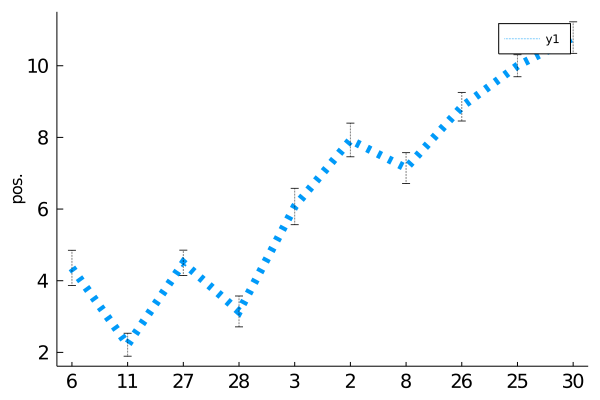

In [70]:
fig=plot(xs, μs, grid=false, yerror=σs,line = (:dot,8)
,xticks=(xs, [6,11,27,28,3, 2,8,26, 25,30])
,xtickfontsize=13
    ,ytickfontsize=13
,ylabel = "pos.")

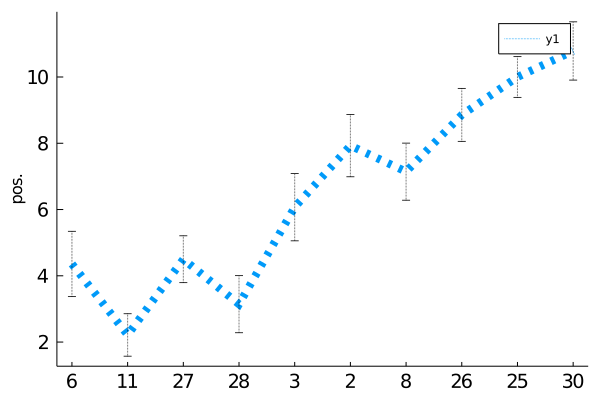

In [71]:
fig=plot(xs, μs, grid=false, yerror=σs2,line = (:dot,8)
,xticks=(xs, [6,11,27,28,3, 2,8,26, 25,30])
,xtickfontsize=13
    ,ytickfontsize=13
,ylabel = "pos.")

In [72]:
matconci = zeros(Float64,10,10)

10×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [73]:
lista = [6,11,27,28, 3, 2,8,26, 25,30]#[6,11,27,28,3]
for (x,i) in enumerate(lista), (y,j) in enumerate(lista)
    matconci[x,y] = findinter(parejapromvar(ranks_univs,i)...,parejapromvar(ranks_univs,j)...)
end

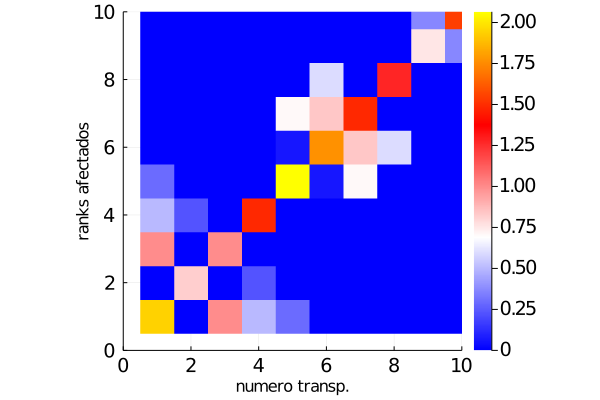

In [76]:
heatmap(1:size(matconci,1),
    1:size(matconci,2), matconci,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,10),ylim=(0,10)
,ytickfontsize=13,xtickfontsize=13)

## Comparativa. Menor es mejor

In [ ]:
;./script.wl figs/posetm3_univ_30.dat

![ejemplo](figs/poset0p95_univ_30.png)

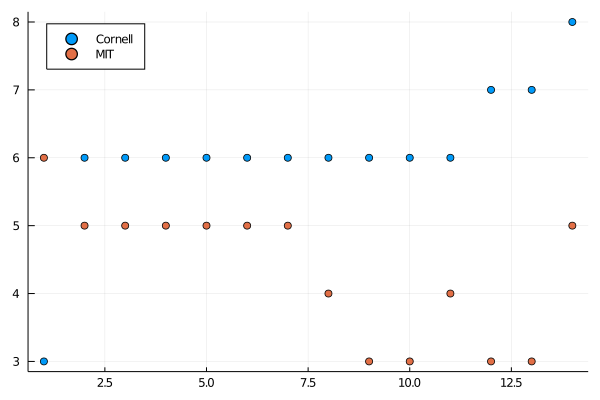

In [13]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[6] for x in 1:14]], labels = ["Cornell" "MIT"],legend=:topleft)

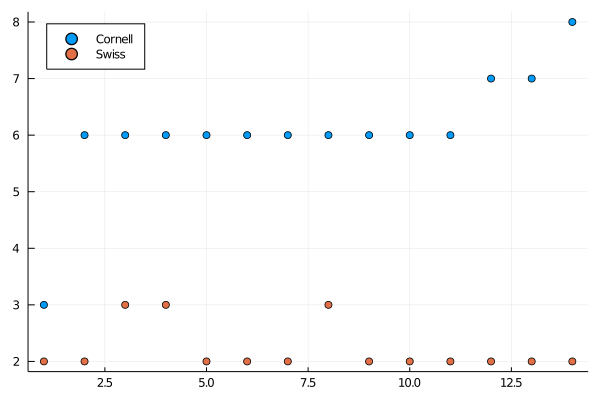

In [14]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["Cornell" "Swiss"],legend=:topleft)

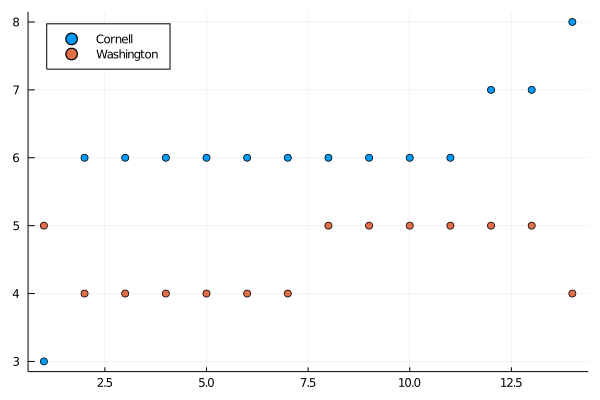

In [15]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[27] for x in 1:14]], labels = ["Cornell" "Washington"],legend=:topleft)

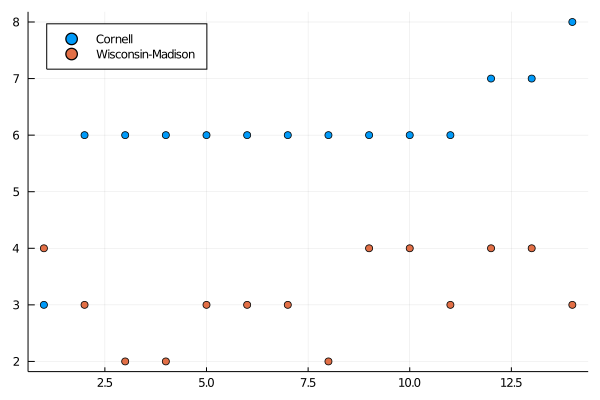

In [16]:
scatter([[sortperm(ranks_univs[x])[3] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Cornell" "Wisconsin-Madison"],legend=:topleft)

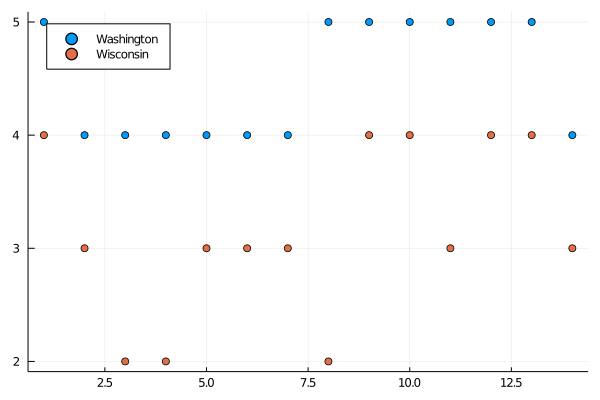

In [17]:
scatter([[sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Washington" "Wisconsin"],legend=:topleft)

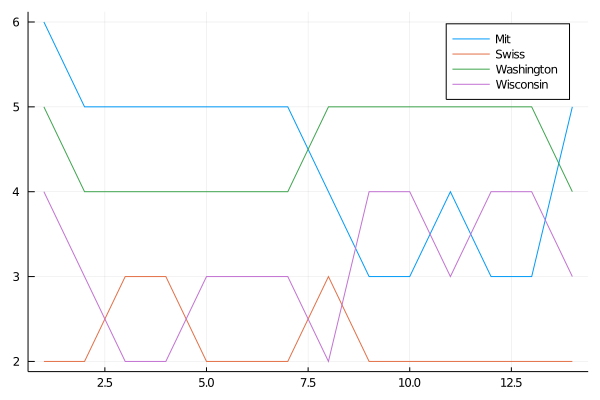

In [39]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14] [sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[28] for x in 1:14]], labels = ["Mit" "Swiss" "Washington" "Wisconsin"],legend=:topright)

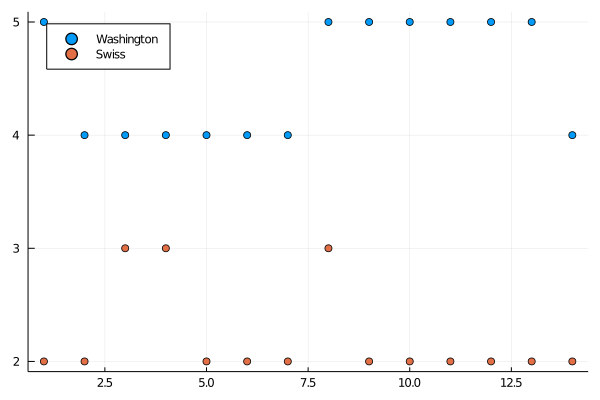

In [18]:
fig_e1 = scatter([[sortperm(ranks_univs[x])[27] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["Washington" "Swiss"],legend=:topleft)

En este caso, Washington vs Swiss, hay una relacion de superioridad Swiss < Washington.

In [38]:
savefig(fig_e1, "/home/david/grafica1.png")

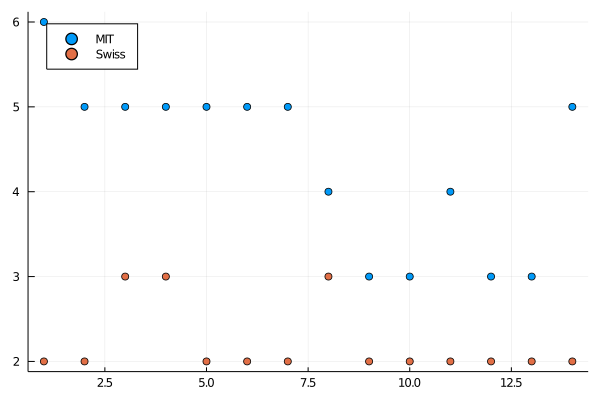

In [20]:
scatter([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft)

In [ ]:
plot(ys, color = [:black :orange], line = (:dot, 4), )

In [ ]:
marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray))

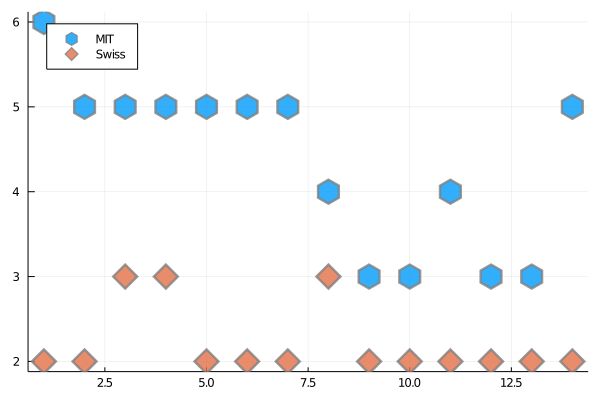

In [47]:
scatter([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft

,line = (:dot,4)
,marker = ([:hex :d], 12, 0.8, Plots.stroke(3, :gray)))

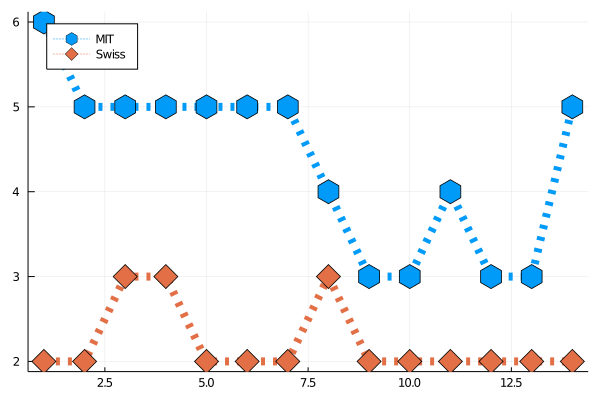

In [56]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft
,line = (:dot,8)
,marker = ([:hex :d], 12))

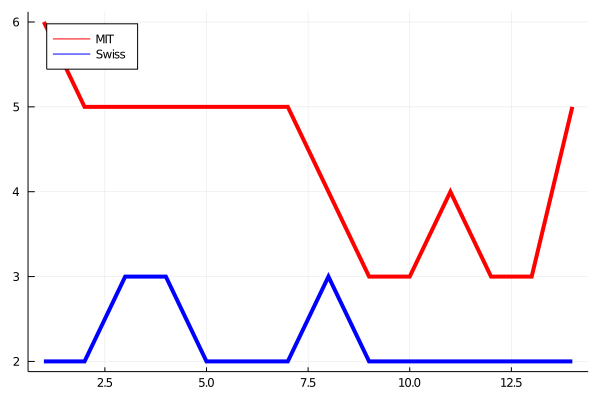

In [42]:
plot([[sortperm(ranks_univs[x])[6] for x in 1:14] [sortperm(ranks_univs[x])[11] for x in 1:14]], labels = ["MIT" "Swiss"],legend=:topleft
,linewidth=[4 4]
,linecolor = [:red :blue])